In [31]:
import pandas as pd
from qgrid import show_grid
import seaborn as sns
from pandas_profiling import ProfileReport
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars
from funpymodeling.data_prep import todf
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
# Fuente: proyecto prueba bot/archive/london_merged.csv
data=pd.read_csv("Londres_bici_compartida/london_merged.csv")

In [3]:
data.timestamp = pd.to_datetime(data.timestamp)
data = data.set_index("timestamp")

In [4]:
data["hour"] = data.index.hour
data["day_of_month"] = data.index.day
data["day_of_week"]  = data.index.dayofweek
data["month"] = data.index.month
data.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  hour  day_of_month  \
timestamp                                                                 
2015-01-04 00:00:00         0.0         1.0     3.0     0             4   
2015-01-04 01:00:00         0.0         1.0     3.0     1             4   
2015-01-04 02:00:00         0.0         1.0     3.0     2             4   
2015-01-04 03:00:00         0.0         1.0     3.0     3             4   
2015-01-04 04:00:00         0.0         1.0     3.0     4             4   

                     day_of_week  month  
timestamp                                
2015-01-04 00:00:00            6      1  
2015-01-04 01:00:00            6      1  
2015-01-04 02:00:00            6      1  
2015-01-04 03:00:00            6      1  
2015-01-04 04:00:00            6      1

In [5]:
data=data.reset_index(drop=False)

In [6]:
status(data)

variable  q_nan  p_nan  q_zeros   p_zeros  unique            type
0      timestamp      0    0.0        0  0.000000   17414  datetime64[ns]
1            cnt      0    0.0        1  0.000057    3781           int64
2             t1      0    0.0       34  0.001952      73         float64
3             t2      0    0.0      232  0.013323      82         float64
4            hum      0    0.0        0  0.000000     143         float64
5     wind_speed      0    0.0       68  0.003905     103         float64
6   weather_code      0    0.0        0  0.000000       7         float64
7     is_holiday      0    0.0    17030  0.977949       2         float64
8     is_weekend      0    0.0    12444  0.714597       2         float64
9         season      0    0.0     4394  0.252326       4         float64
10          hour      0    0.0      724  0.041576      24           int64
11  day_of_month      0    0.0        0  0.000000      31           int64
12   day_of_week      0    0.0     2508  0.144022       7           int64
13         month      0    0.0        0  0.000000      12           int64

In [7]:
data.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  hour  day_of_month  day_of_week  month  
0         0.0         1.0     3.0     0             4            6      1  
1         0.0         1.0     3.0     1             4            6      1  
2         0.0         1.0     3.0     2             4            6      1  
3         0.0         1.0     3.0     3             4            6      1  
4         0.0         1.0     3.0     4             4            6      1

In [8]:
data.shape

(17414, 14)

In [9]:
from qgrid import show_grid

show_grid(data, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 200})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [10]:
from funpymodeling.exploratory import status 
status(data)

variable  q_nan  p_nan  q_zeros   p_zeros  unique            type
0      timestamp      0    0.0        0  0.000000   17414  datetime64[ns]
1            cnt      0    0.0        1  0.000057    3781           int64
2             t1      0    0.0       34  0.001952      73         float64
3             t2      0    0.0      232  0.013323      82         float64
4            hum      0    0.0        0  0.000000     143         float64
5     wind_speed      0    0.0       68  0.003905     103         float64
6   weather_code      0    0.0        0  0.000000       7         float64
7     is_holiday      0    0.0    17030  0.977949       2         float64
8     is_weekend      0    0.0    12444  0.714597       2         float64
9         season      0    0.0     4394  0.252326       4         float64
10          hour      0    0.0      724  0.041576      24           int64
11  day_of_month      0    0.0        0  0.000000      31           int64
12   day_of_week      0    0.0     2508  0.144022       7           int64
13         month      0    0.0        0  0.000000      12           int64

In [11]:
from funpymodeling.exploratory import profiling_num


profiling_num(data)

variable         mean      std_dev  variation_coef  p_0.01  p_0.05  \
0            cnt  1143.101642  1085.108068        0.949266   29.13   53.65   
1             t1    12.468091     5.571818        0.446886    1.00    4.00   
2             t2    11.520836     6.615145        0.574190   -2.00    1.00   
3            hum    72.324954    14.313186        0.197901   36.50   45.50   
4     wind_speed    15.913063     7.894570        0.496106    2.00    5.00   
5   weather_code     2.722752     2.341163        0.859852    1.00    1.00   
6     is_holiday     0.022051     0.146854        6.659693    0.00    0.00   
7     is_weekend     0.285403     0.451619        1.582393    0.00    0.00   
8         season     1.492075     1.118911        0.749902    0.00    0.00   
9           hour    11.513265     6.915893        0.600689    0.00    1.00   
10  day_of_month    15.751981     8.793704        0.558260    1.00    2.00   
11   day_of_week     2.992650     2.004060        0.669661    0.00    0.00   
12         month     6.514643     3.452509        0.529961    1.00    1.00   

    p_0.25  p_0.5   p_0.75  p_0.95   p_0.99  
0    257.0  844.0  1671.75  3528.7  4552.74  
1      8.0   12.5    16.00    22.0    25.50  
2      6.0   12.5    16.00    21.5    25.50  
3     63.0   74.5    83.00    93.0    96.50  
4     10.0   15.0    20.50    30.5    38.00  
5      1.0    2.0     3.00     7.0     7.00  
6      0.0    0.0     0.00     0.0     1.00  
7      0.0    0.0     1.00     1.0     1.00  
8      0.0    1.0     2.00     3.0     3.00  
9      6.0   12.0    18.00    22.0    23.00  
10     8.0   16.0    23.00    29.0    31.00  
11     1.0    3.0     5.00     6.0     6.00  
12     4.0    7.0    10.00    12.0    12.00

In [12]:
from pandas_profiling import ProfileReport

ProfileReport(data, minimal=True)

array([[<AxesSubplot:title={'center':'cnt'}>,
        <AxesSubplot:title={'center':'t1'}>,
        <AxesSubplot:title={'center':'t2'}>,
        <AxesSubplot:title={'center':'hum'}>],
       [<AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'weather_code'}>,
        <AxesSubplot:title={'center':'is_holiday'}>,
        <AxesSubplot:title={'center':'is_weekend'}>],
       [<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'day_of_month'}>,
        <AxesSubplot:title={'center':'day_of_week'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

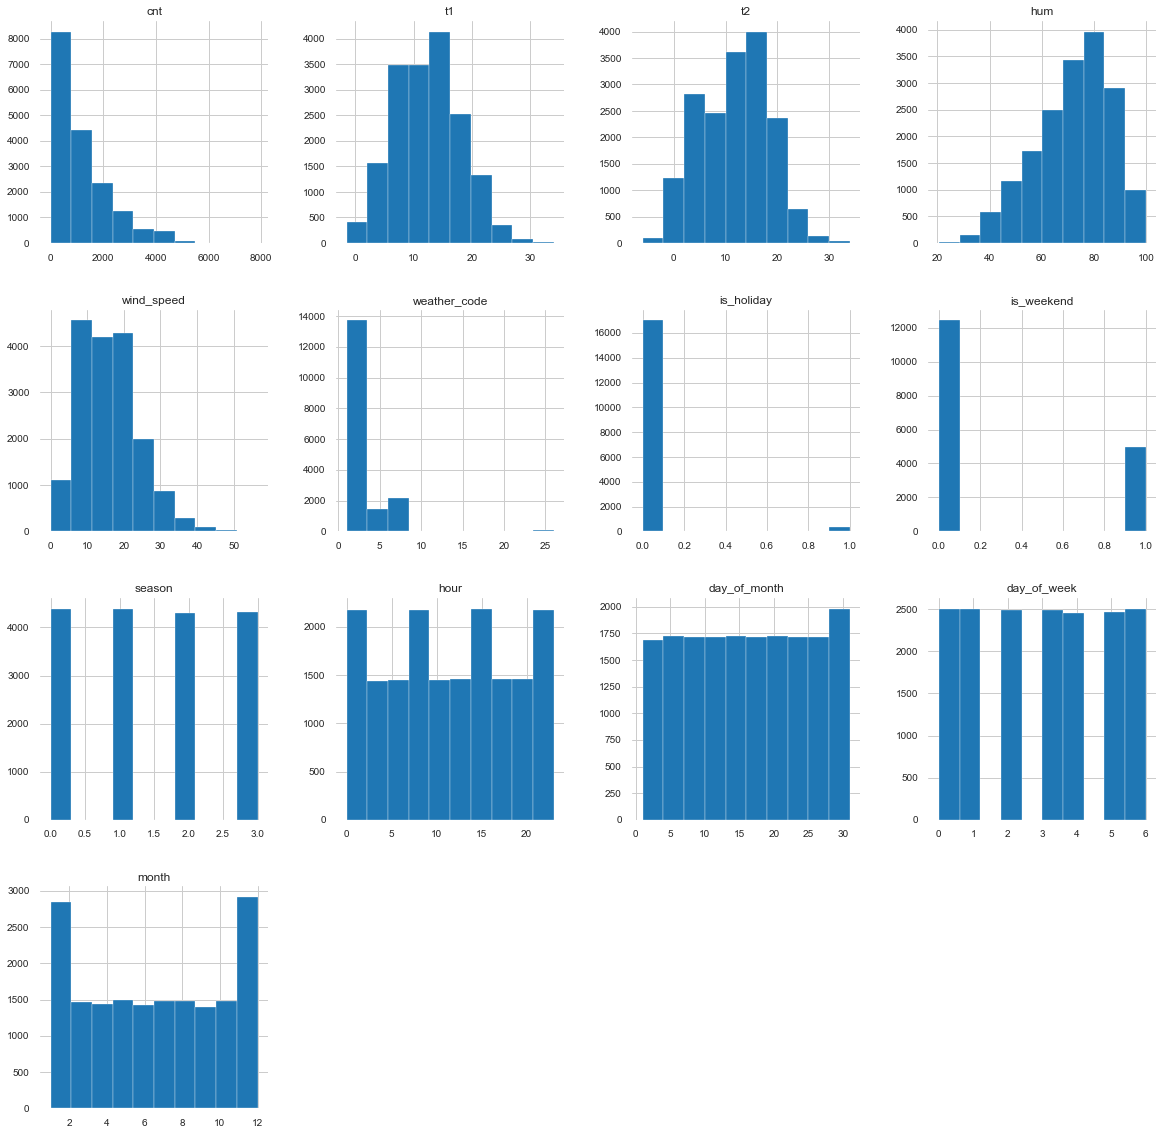

In [13]:
data.hist(figsize = (20,20))

<AxesSubplot:>

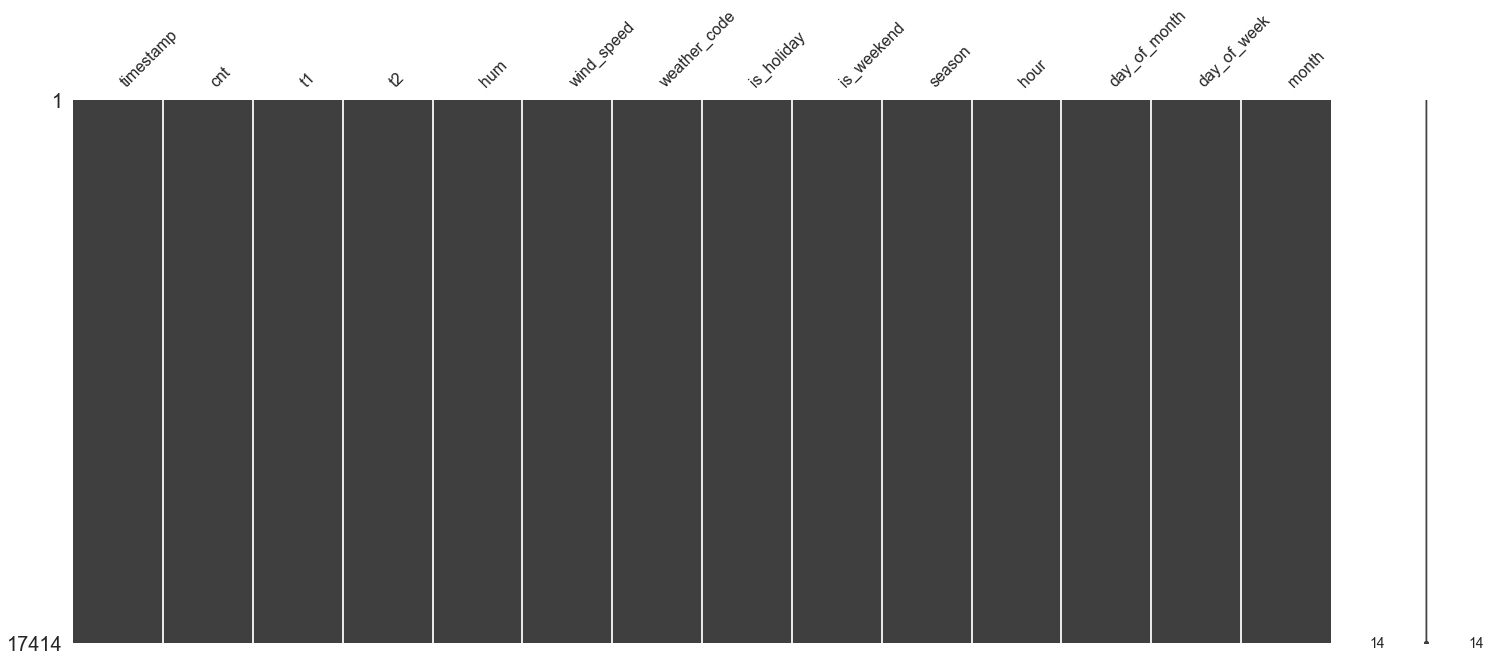

In [14]:
import missingno as msno
msno.matrix(data)

<AxesSubplot:>

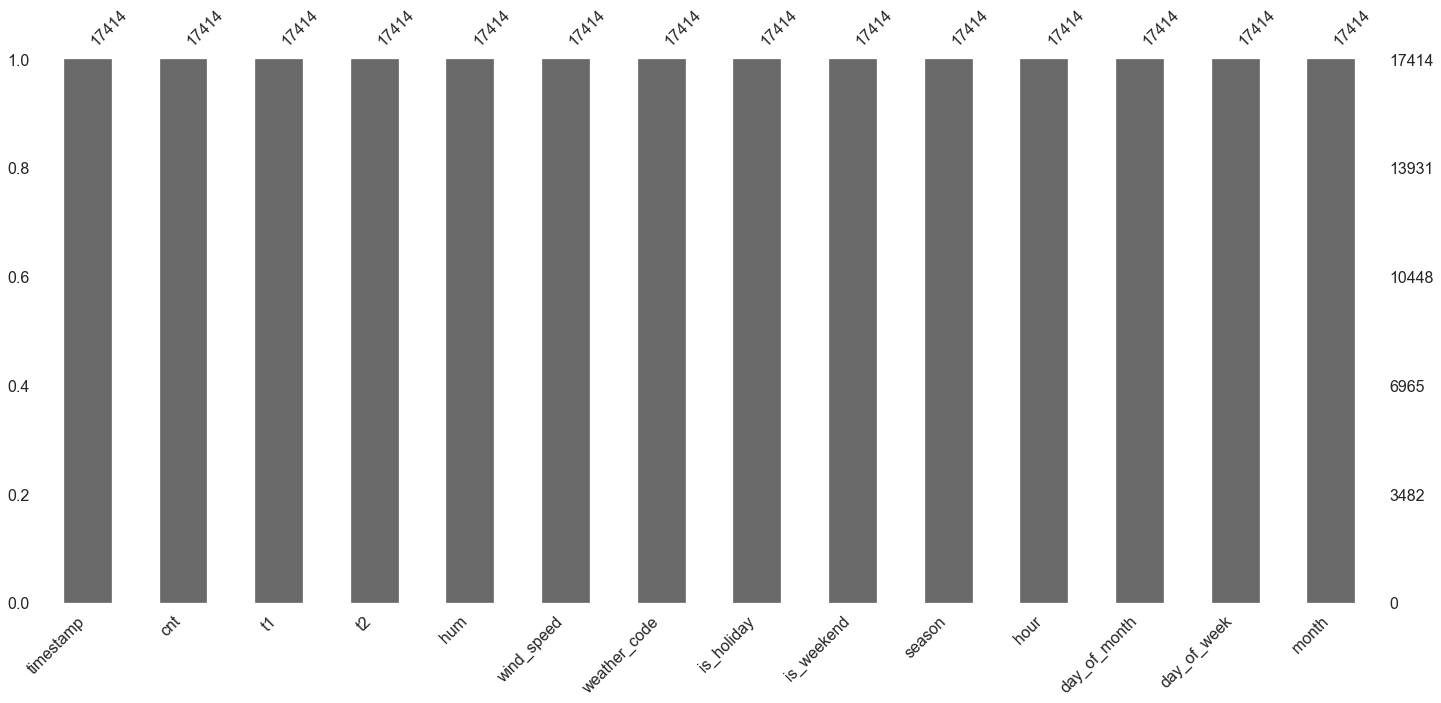

In [15]:
msno.bar(data)

In [16]:
cat_vars(data)

Index([], dtype='object')

**Preparación de datos**

In [1032]:
x_data=data.copy()

# saquemos otras...
x_data=x_data.drop(['timestamp','hour','day_of_month','day_of_week','month','season'], axis=1)

In [1033]:
#x_data['season']=x_data['season'].astype(str)

In [1034]:
#,'hour','day_of_month','day_of_week','month','is_holiday'

**UMAP**

In [1035]:
import umap
x_scaled = StandardScaler().fit_transform(x_data)
model_umap = umap.UMAP(n_components=2)

In [1036]:
embedding = model_umap.fit_transform(x_scaled)
embedding.shape

(17414, 2)

In [1037]:
x_data2=x_data.copy()
x_data2=x_data2.reset_index(drop=True) # IMPORTANTEEEEE!
x_data2[['dim1', 'dim2']]=embedding

In [1038]:
x_data2

cnt   t1   t2    hum  wind_speed  weather_code  is_holiday  \
0       182  3.0  2.0   93.0         6.0           3.0         0.0   
1       138  3.0  2.5   93.0         5.0           1.0         0.0   
2       134  2.5  2.5   96.5         0.0           1.0         0.0   
3        72  2.0  2.0  100.0         0.0           1.0         0.0   
4        47  2.0  0.0   93.0         6.5           1.0         0.0   
...     ...  ...  ...    ...         ...           ...         ...   
17409  1042  5.0  1.0   81.0        19.0           3.0         0.0   
17410   541  5.0  1.0   81.0        21.0           4.0         0.0   
17411   337  5.5  1.5   78.5        24.0           4.0         0.0   
17412   224  5.5  1.5   76.0        23.0           4.0         0.0   
17413   139  5.0  1.0   76.0        22.0           2.0         0.0   

       is_weekend       dim1      dim2  
0             1.0  16.930819  5.232016  
1             1.0  16.856379  5.542815  
2             1.0  16.891617  5.421100  
3             1.0  16.843552  5.461998  
4             1.0  16.754007  5.828237  
...           ...        ...       ...  
17409         0.0   3.281211  4.467982  
17410         0.0   4.115249  4.289886  
17411         0.0   4.200983  4.254181  
17412         0.0   4.244093  4.264984  
17413         0.0   3.946609  4.005322  

[17414 rows x 10 columns]

In [1039]:
status(x_data2)

variable  q_nan  p_nan  q_zeros   p_zeros  unique     type
0           cnt      0    0.0        1  0.000057    3781    int64
1            t1      0    0.0       34  0.001952      73  float64
2            t2      0    0.0      232  0.013323      82  float64
3           hum      0    0.0        0  0.000000     143  float64
4    wind_speed      0    0.0       68  0.003905     103  float64
5  weather_code      0    0.0        0  0.000000       7  float64
6    is_holiday      0    0.0    17030  0.977949       2  float64
7    is_weekend      0    0.0    12444  0.714597       2  float64
8          dim1      0    0.0        0  0.000000   17407  float64
9          dim2      0    0.0        0  0.000000   17408  float64

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

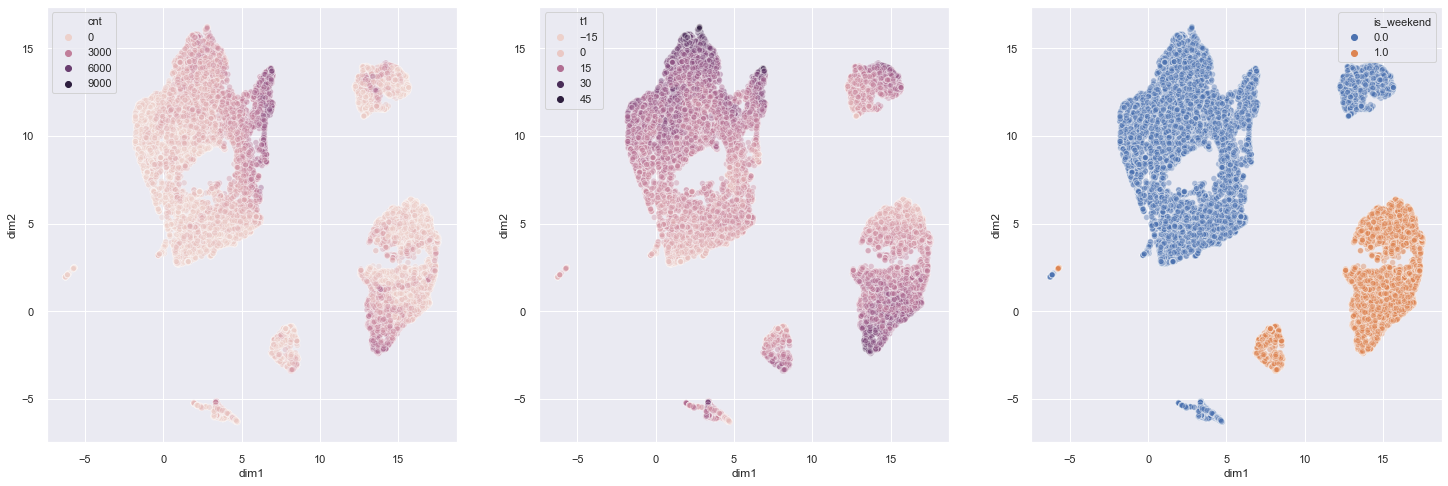

In [1040]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,8))
sns.scatterplot(x="dim1", y="dim2", hue="cnt", data=x_data2, alpha=0.4, ax=ax1)
sns.scatterplot(x="dim1", y="dim2", hue="t1", data=x_data2, alpha=0.4, ax=ax2)
sns.scatterplot(x="dim1", y="dim2", hue="is_weekend", data=x_data2, alpha=0.4, ax=ax3)

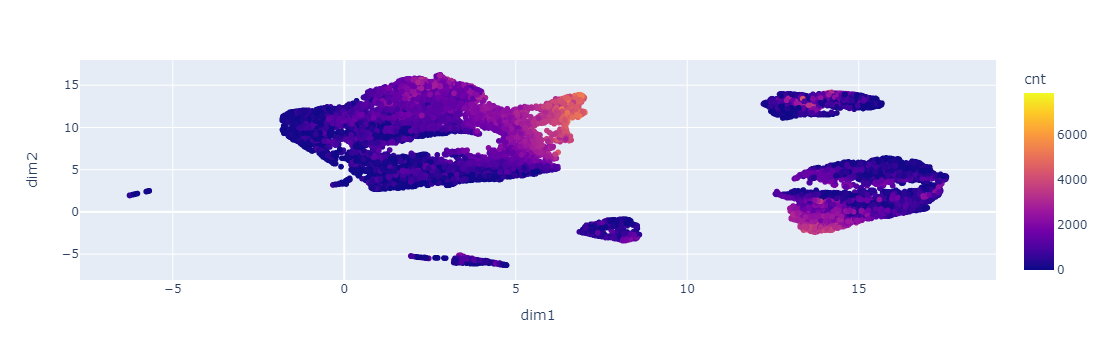

In [1041]:
import plotly.express as px

fig = px.scatter(x_data2, x="dim1", y="dim2", color="cnt", hover_data=['cnt','t1','is_weekend'])
fig.show()

**Modelo**

In [1042]:
x_data3=x_data2.copy()
x_data3_coord_proy=x_data3.loc[:,['dim1','dim2']]

In [1043]:
import hdbscan
model_hdb_bike = hdbscan.HDBSCAN(min_cluster_size=1000, prediction_data = True).fit(x_data3_coord_proy)

In [1044]:
freq_tbl(model_hdb_bike.labels_.astype('str'))

0  frequency  percentage  cumulative_perc
0   2      10579    0.607500         0.607500
1   0       4318    0.247961         0.855461
2   1       1449    0.083209         0.938670
3  -1       1068    0.061330         1.000000

In [1045]:
cluster_var='cluster'          # definan nombre de var de clustering
x_data_cluster=x_data3.copy()       # aca agregue todos los datos para que aparezcan en el dataset
x_data_cluster[cluster_var]=model_hdb_bike.labels_    

In [1046]:
x_data_cluster.head()

cnt   t1   t2    hum  wind_speed  weather_code  is_holiday  is_weekend  \
0  182  3.0  2.0   93.0         6.0           3.0         0.0         1.0   
1  138  3.0  2.5   93.0         5.0           1.0         0.0         1.0   
2  134  2.5  2.5   96.5         0.0           1.0         0.0         1.0   
3   72  2.0  2.0  100.0         0.0           1.0         0.0         1.0   
4   47  2.0  0.0   93.0         6.5           1.0         0.0         1.0   

        dim1      dim2  cluster  
0  16.930819  5.232016        0  
1  16.856379  5.542815        0  
2  16.891617  5.421100        0  
3  16.843552  5.461998        0  
4  16.754007  5.828237        0

In [1047]:
show_grid(x_data_cluster, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 200})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [1048]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(x_data_cluster, model_hdb_bike.labels_)

In [1049]:
sil_avg

-0.22042047650894614

In [1050]:
sample_silhouette_values = silhouette_samples(x_data_cluster, model_hdb_bike.labels_)

In [1051]:
sample_silhouette_values

array([-0.46572133, -0.46088296, -0.45964294, ..., -0.58595539,
       -0.59152588, -0.5781308 ])

In [1052]:
res_sil=pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': model_hdb_bike.labels_})

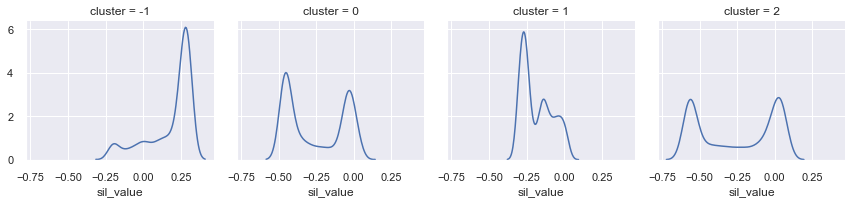

In [1053]:
g = sns.FacetGrid(res_sil, col='cluster')
g = g.map(sns.kdeplot, 'sil_value')

In [1054]:
res_sil.groupby('cluster').mean('sil_value')

sil_value
cluster           
-1        0.183003
 0       -0.253258
 1       -0.182181
 2       -0.252983

In [1055]:
x_data_cluster=x_data_cluster[x_data_cluster['cluster']!=-1]

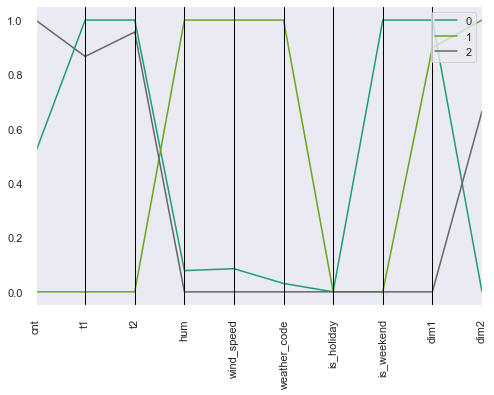

In [1056]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cluster, cluster_var)

In [1057]:
pd.options.display.max_columns = None

In [1058]:
d_orig

cnt         t1         t2        hum  wind_speed  weather_code  \
0  1046.411070  12.637757  11.700865  71.440308   15.761830      2.137332   
1   795.454106  12.301932  11.312974  81.863354   18.105935      7.024845   
2  1284.527933  12.592731  11.683808  70.557945   15.543766      1.982040   

   is_holiday  is_weekend       dim1       dim2  cluster  
0         0.0         1.0  15.115750   2.139584        0  
1         0.0         0.0  13.843548  12.870079        1  
2         0.0         0.0   2.628372   9.262967        2

In [1059]:
d_transf

cnt        t1        t2       hum  wind_speed  weather_code  \
0  0.513127  1.000000  1.000000  0.078048    0.085109      0.030795   
1  0.000000  0.000000  0.000000  1.000000    1.000000      1.000000   
2  1.000000  0.865925  0.956026  0.000000    0.000000      0.000000   

   is_holiday  is_weekend      dim1      dim2  cluster  
0         0.0         1.0  1.000000  0.000000        0  
1         0.0         0.0  0.898121  1.000000        1  
2         0.0         0.0  0.000000  0.663845        2

In [1060]:
status(x_data_cluster)

variable  q_nan  p_nan  q_zeros   p_zeros  unique     type
0            cnt      0    0.0        0  0.000000    3770    int64
1             t1      0    0.0       34  0.002080      73  float64
2             t2      0    0.0      203  0.012419      82  float64
3            hum      0    0.0        0  0.000000     142  float64
4     wind_speed      0    0.0       66  0.004038      99  float64
5   weather_code      0    0.0        0  0.000000       6  float64
6     is_holiday      0    0.0    16346  1.000000       1  float64
7     is_weekend      0    0.0    12028  0.735838       2  float64
8           dim1      0    0.0        0  0.000000   16339  float64
9           dim2      0    0.0        0  0.000000   16340  float64
10       cluster      0    0.0     4318  0.264162       3    int64

In [1061]:
freq_tbl(x_data_cluster['cluster'].astype(str))

cluster  frequency  percentage  cumulative_perc
0       2      10579    0.647192         0.647192
1       0       4318    0.264162         0.911354
2       1       1449    0.088646         1.000000

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

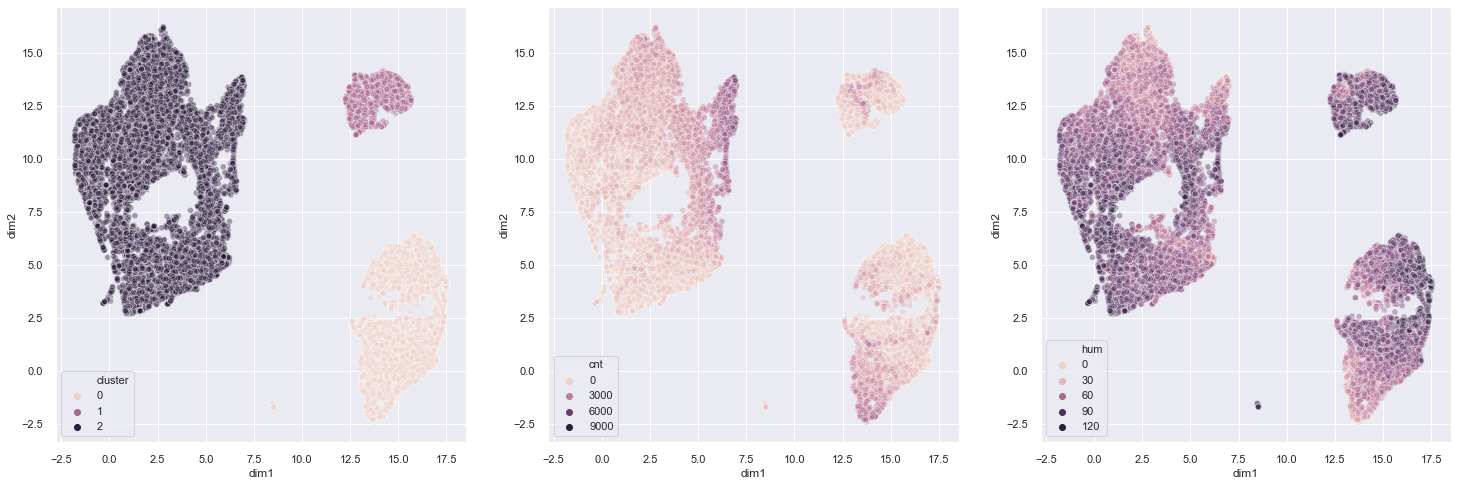

In [1062]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,8))
sns.scatterplot(x="dim1", y="dim2", hue="cluster", data=x_data_cluster, alpha=0.4, ax=ax1)
sns.scatterplot(x="dim1", y="dim2", hue="cnt", data=x_data_cluster, alpha=0.4, ax=ax2)
sns.scatterplot(x="dim1", y="dim2", hue="hum", data=x_data_cluster, alpha=0.4, ax=ax3)

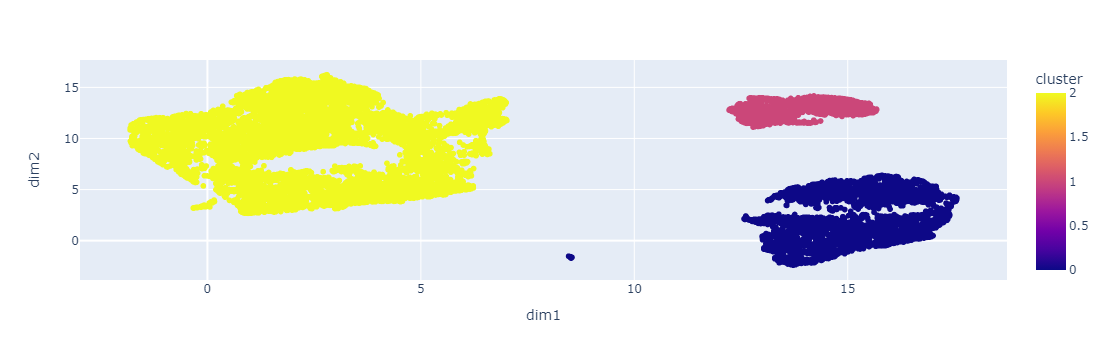

In [1063]:
import plotly.express as px

fig = px.scatter(x_data_cluster, x="dim1", y="dim2", color="cluster", hover_data=['cnt','hum','is_weekend'])
fig.show()